In [5]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from xgboost import plot_importance

from hnmchallenge.constant import *
from hnmchallenge.data_reader import DataReader
from hnmchallenge.dataset import Dataset
from hnmchallenge.evaluation.python_evaluation import map_at_k, recall_at_k
from hnmchallenge.feature_manager import FeatureManager
from hnmchallenge.filtered_dataset import FilterdDataset
from hnmchallenge.models.ease.ease import EASE
from hnmchallenge.models.itemknn.itemknn import ItemKNN
from hnmchallenge.models.sgmc.sgmc import SGMC
from hnmchallenge.models.top_pop import TopPop
from hnmchallenge.stratified_dataset import StratifiedDataset

In [6]:
dataset = StratifiedDataset()
dr = DataReader()

In [7]:
base_load_path = dr.get_preprocessed_data_path() / "xgb_models"

In [8]:
DATASET = "dataset_v1_0.feather"
MODEL_NAME = f"xgb_{DATASET}.json"

In [9]:
model = xgb.XGBRanker()
model.load_model(base_load_path/MODEL_NAME)

In [10]:
from xgboost import plot_importance

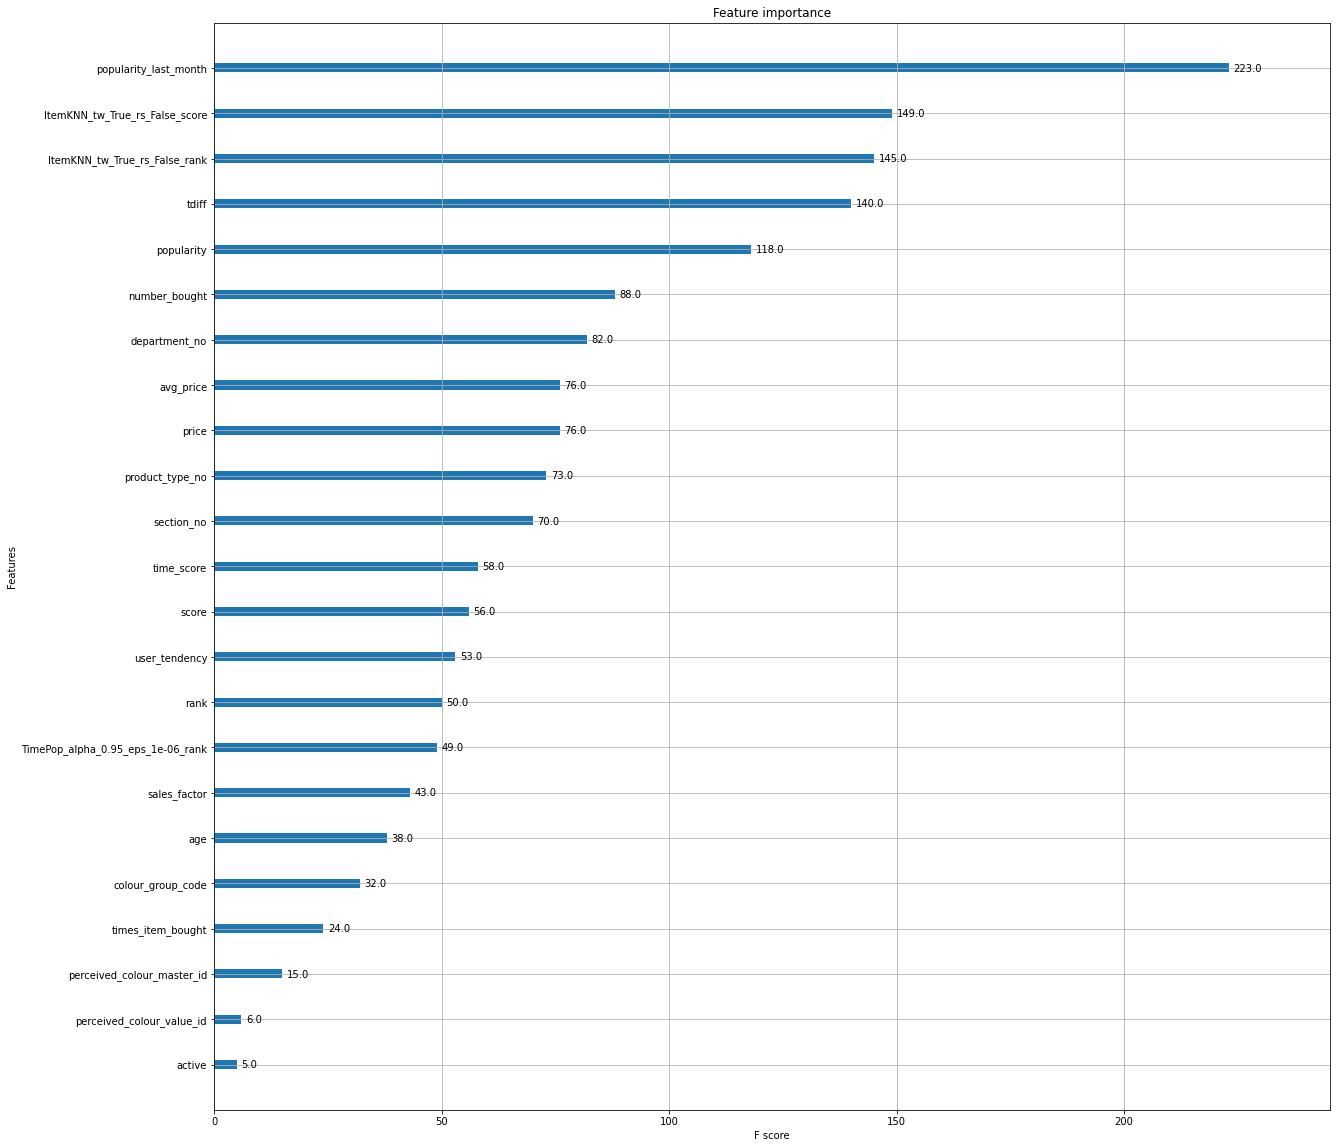

In [11]:
fig, ax = plt.subplots(figsize=(20, 20))
plot_importance(model, ax=ax)
plt.show()

In [12]:
model.best_ntree_limit

97

In [13]:
features = pd.read_feather(dr.get_preprocessed_data_path()/ f"dataset_dfs/full/{DATASET}")

# Remember to use the bert_ntree_limit when taking the predictions

In [14]:
features.head()

,customer_id,ItemKNN_tw_True_rs_False_score,ItemKNN_tw_True_rs_False_rank,score,TimePop_alpha_0.95_eps_1e-06_rank,article_id,rank,colour_group_code,department_no,popularity,...,section_no,price,sales_factor,active,age,avg_price,user_tendency,time_score,tdiff,times_item_bought
0,0,0.010266,1.0,0.989511,2.0,1482.0,0,71,1747,9558.0,...,53,0.033881,0.000000,0.0,22.0,0.027085,0.214286,1.0,0.006211,1.0
1,0,NaN,NaN,0.025881,19.0,7.0,1,9,1616,2449.0,...,11,0.024627,0.030687,0.0,22.0,0.027085,0.214286,NaN,NaN,NaN
2,0,NaN,NaN,0.012946,74.0,8.0,2,9,1338,1645.0,...,61,0.016932,0.000000,0.0,22.0,0.027085,0.214286,NaN,NaN,NaN
3,0,NaN,NaN,0.015893,47.0,45.0,3,9,3608,10761.0,...,62,0.006102,0.278557,0.0,22.0,0.027085,0.214286,NaN,NaN,NaN
4,0,NaN,NaN,0.020914,30.0,56.0,4,9,1616,2122.0,...,11,0.016932,0.230947,0.0,22.0,0.027085,0.214286,NaN,NaN,NaN


In [15]:
customer_article_df = features[[DEFAULT_USER_COL, DEFAULT_ITEM_COL]].copy()
X = features.drop([DEFAULT_USER_COL, DEFAULT_ITEM_COL], axis=1)

In [16]:
X.head()

,ItemKNN_tw_True_rs_False_score,ItemKNN_tw_True_rs_False_rank,score,TimePop_alpha_0.95_eps_1e-06_rank,rank,colour_group_code,department_no,popularity,popularity_last_month,number_bought,...,section_no,price,sales_factor,active,age,avg_price,user_tendency,time_score,tdiff,times_item_bought
0,0.010266,1.0,0.989511,2.0,0,71,1747,9558.0,93.0,25485,...,53,0.033881,0.000000,0.0,22.0,0.027085,0.214286,1.0,0.006211,1.0
1,NaN,NaN,0.025881,19.0,1,9,1616,2449.0,127.0,16694,...,11,0.024627,0.030687,0.0,22.0,0.027085,0.214286,NaN,NaN,NaN
2,NaN,NaN,0.012946,74.0,2,9,1338,1645.0,45.0,8351,...,61,0.016932,0.000000,0.0,22.0,0.027085,0.214286,NaN,NaN,NaN
3,NaN,NaN,0.015893,47.0,3,9,3608,10761.0,234.0,10252,...,62,0.006102,0.278557,0.0,22.0,0.027085,0.214286,NaN,NaN,NaN
4,NaN,NaN,0.020914,30.0,4,9,1616,2122.0,79.0,13490,...,11,0.016932,0.230947,0.0,22.0,0.027085,0.214286,NaN,NaN,NaN


In [17]:
y_pred = model.predict(X, ntree_limit=model.best_ntree_limit)

/raid/home/edoardo/GitProjects/HnMChallenge/.venv/lib/python3.9/site-packages/xgboost/core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/raid/home/edoardo/GitProjects/HnMChallenge/.venv/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [18]:
customer_article_df["predicted_score"] = y_pred

In [19]:
customer_article_df

,customer_id,article_id,predicted_score
0,0,1482.0,1.705850
1,0,7.0,-0.142008
2,0,8.0,-0.874362
3,0,45.0,-1.467105
4,0,56.0,-0.405122
...,...,...,...
207848715,1136205,20285.0,0.025340
207848716,1136205,1330.0,0.183403
207848717,1136205,1793.0,0.643148
207848718,1136205,8347.0,1.121743


In [29]:
sorted_scores = customer_article_df.sort_values([DEFAULT_USER_COL, "predicted_score"], ascending=[True, False])

In [30]:
sorted_scores

,customer_id,article_id,predicted_score
100,0,1638.0,2.147621
101,0,1797.0,1.737130
0,0,1482.0,1.705850
118,0,1488.0,1.638463
111,0,4259.0,1.496184
...,...,...,...
207848560,1136205,2651.0,-3.956331
207848603,1136205,291.0,-4.123458
207848533,1136205,1597.0,-4.139090
207848539,1136205,2290.0,-4.150221


In [31]:
sorted_scores_index = sorted_scores.reset_index(drop=True)

In [32]:
cutoff = sorted_scores_index.groupby(DEFAULT_USER_COL).size().values
i=0 
filter_indices = []
for cut in cutoff:
    filter_indices.extend(range(i, i+12))
    i=i+cut

In [33]:
final_df = sorted_scores_index.loc[filter_indices]

In [34]:
final_df

,customer_id,article_id,predicted_score
0,0,1638.0,2.147621
1,0,1797.0,1.737130
2,0,1482.0,1.705850
3,0,1488.0,1.638463
4,0,4259.0,1.496184
...,...,...,...
207848527,1136205,4607.0,1.188839
207848528,1136205,2609.0,1.150777
207848529,1136205,8347.0,1.121743
207848530,1136205,10033.0,1.109753


In [35]:
final_final_df = final_df.drop("predicted_score", axis=1)

In [36]:
from hnmchallenge.submission_handler import SubmissionHandler
sh = SubmissionHandler()                                               

In [37]:
sh.create_submission_filtered_data([final_final_df], sub_name="ensemble_1")